## 减轻过拟合：剪枝参数和回归调参
限制叶子节点
与subsample不同：subsample随机抽样
三组随机参数：colsample_bytree,solsample_bylevel,colsample_bynode
对特征随机抽样；决策树和RF中常用，boosting中不常用,xgboost中加入；
前两个常用，对模型有较大影响

- 调整顺序：
n_estimators eta->gamma/max_depth(过拟合/欠你合)->决定是否剪枝

In [1]:
import xgboost as xgb
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [2]:
data = load_boston()
X, y = data.data, data.target

In [27]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3)

In [4]:
dfull = xgb.DMatrix(X,y)
param1 = {'silent': True # 非默认
         , 'obj': 'reg:linear'  # 非默认
         , 'subsample':1
         , 'max_depth':6
         , 'eta':0.3
         , 'gamma':0
         , 'lambda':1
         , 'alpha':0
         , 'colsample_bytree':1
         , 'colsample_bylevel':1
         , 'colsample_bynode':1
         , 'n_fold':5}
num_round = 200

time0 = time()
cvResult = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:489769


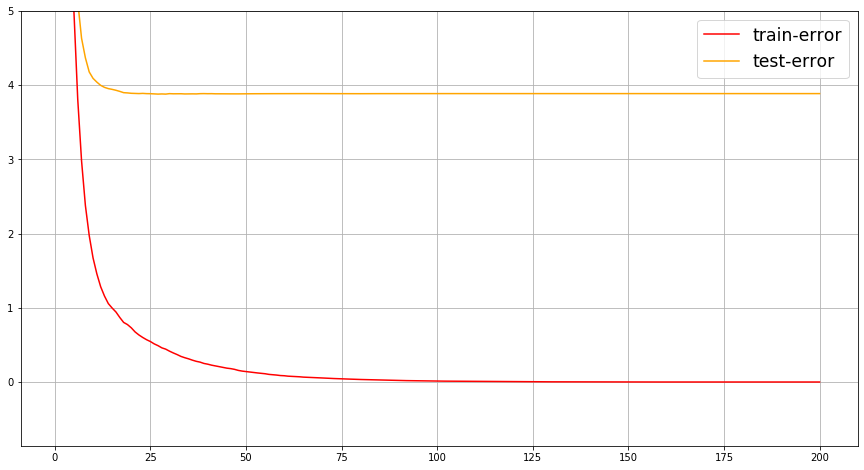

In [10]:
fig, ax = plt.subplots(1,figsize=(15,8))
ax.grid()
ax.plot(range(1,201), cvResult.iloc[:,0], c='r', label='train-error')
ax.plot(range(1,201), cvResult.iloc[:,2], c='orange', label='test-error')
ax.set_ylim(top=5)
plt.legend(fontsize='xx-large')
plt.show()

00:00:327352
00:00:125077
00:00:188766


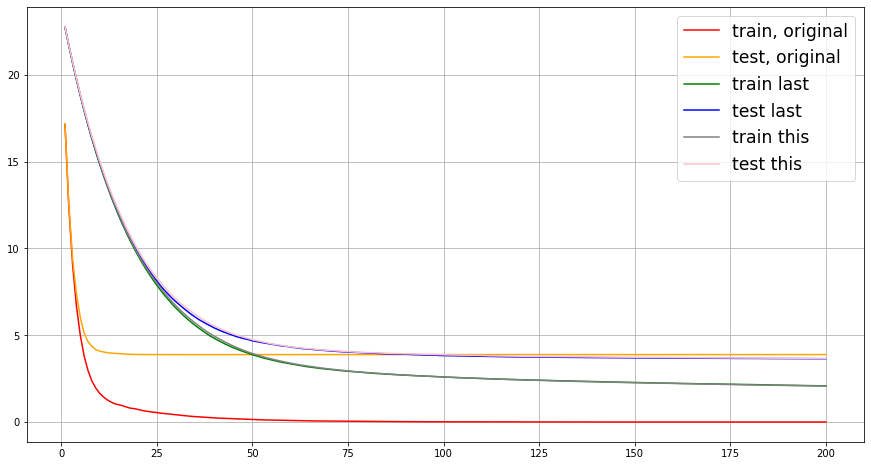

In [25]:
dfull = xgb.DMatrix(X,y)
param1 = {'silent': True # 非默认
         , 'obj': 'reg:linear'  # 非默认
         , 'subsample':1
         , 'max_depth':6
         , 'eta':0.3
         , 'gamma':0
         , 'lambda':1
         , 'alpha':0
         , 'colsample_bytree':1
         , 'colsample_bylevel':1
         , 'colsample_bynode':1
         , 'n_fold':5}
num_round = 200

time0 = time()
cvResult = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig, ax = plt.subplots(1,figsize=(15,8))
ax.grid()
ax.plot(range(1,201), cvResult.iloc[:,0], c='r', label='train, original')
ax.plot(range(1,201), cvResult.iloc[:,2], c='orange', label='test, original')

param2 = {'silent':True
         , 'obj':'reg:linear'
         , 'nfold':5
         , 'eta':0.05
         , 'max_depth':2}

param3 = {'silent':True
         , 'obj':'reg:linear'
         , 'nfold':5
         , 'eta':0.05
         , 'gamma':0
         , 'max_depth':2
         , 'lambda':1
         , 'alpha':0
         , 'colsample_bytree':1
         , 'colsample_bylevel':0.4
         , 'colsample_bynode':1}
time0 = time()
cvResult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvResult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1,201), cvResult2.iloc[:,0], c='green', label='train last')
ax.plot(range(1,201), cvResult2.iloc[:,2], c='blue', label='test last')


ax.plot(range(1,201), cvResult3.iloc[:,0], c='grey', label='train this')
ax.plot(range(1,201), cvResult3.iloc[:,2], c='pink', label='test this')
ax.legend(fontsize='xx-large')
plt.show()

## XGBoost模型的保存和调用
### 使用Pickle保存和调用模型
pickle是python编程中比较标准的一个保存和调用模型的库。我们可以使用pickle和open函数连用，来将我们的模型保存到本地。以刚才训练好的模型为例来

In [26]:
import pickle

In [28]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)

# 设定参数对模型训练
param = {'silent':True
         , 'obj':'reg:linear'
         , 'nfold':5
         , 'eta':0.05
         , 'gamma':20
         , 'max_depth':4
         , 'lambda':3.5
         , 'alpha':0
         , 'colsample_bytree':0.4
         , 'colsample_bylevel':0.6
         , 'colsample_bynode':1}
num_round=200

bst = xgb.train(param, dtrain, num_round)

In [29]:
# 保存模型
pickle.dump(bst, open("xgboostboston.dat",'wb'))

# 注意：open中使用wor r表示写入或者读取。但其实w和r只能用于文本文件 .txt
# 当我们不希望导入的不是文本文件，而是模型本身，使用‘wb’或‘rb'作为写入或者读取的模式
# 表示二进制读入和写入，以保证open保存的模型是可以读取或者调用的模型

In [31]:
# 模型保存到哪里
import sys
sys.path
# 第一行 现在运行的目录

['/home/esterl/anaconda3/lib/python36.zip',
 '/home/esterl/anaconda3/lib/python3.6',
 '/home/esterl/anaconda3/lib/python3.6/lib-dynload',
 '',
 '/home/esterl/.local/lib/python3.6/site-packages',
 '/home/esterl/anaconda3/lib/python3.6/site-packages',
 '/home/esterl/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/esterl/.ipython']

In [1]:
# 重新打开jupyter notebook 进行调库
import xgboost as xgb
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [2]:
data = load_boston()
X, y = data.data, data.target
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3)

In [3]:
# 注意保存的模型为xgboost库中建立的模型，则导入的数据类型也应该i是xgboost库中的数据类型
dtest = xgb.DMatrix(Xtest, Ytest)

import pickle
from sklearn.metrics import mean_squared_error as MSE

In [4]:
# 导入模型
loaded_model = pickle.load(open('xgboostboston.dat', 'rb'))
print('loaded model from: xgboostboston.dat')


loaded model from: xgboostboston.dat


In [6]:
# 预测

y_predict = loaded_model.predict(dtest)

MSE(Ytest, y_predict)

13.778837263902128

## 使用Joblib保存和调用模型
Joblib是Scipy生态的一部分，其为Python提供保存和调用管道和对象，来处理NumPy数据结构更为高效，对于**很大的数据集和巨大的模型**useful.

不需要和open连用

In [7]:
dtrain = xgb.DMatrix(Xtrain, Ytrain)
# 设定参数对模型训练
param = {'silent':True
         , 'obj':'reg:linear'
         , 'nfold':5
         , 'eta':0.05
         , 'gamma':20
         , 'max_depth':4
         , 'lambda':3.5
         , 'alpha':0
         , 'colsample_bytree':0.4
         , 'colsample_bylevel':0.6
         , 'colsample_bynode':1}
num_round=200

bst = xgb.train(param, dtrain, num_round)

In [8]:
import joblib

joblib.dump(bst, 'xgboost-boston-joblib.dat')

['xgboost-boston-joblib.dat']

In [9]:
loaded_model_joblib = joblib.load('xgboost-boston-joblib.dat')

In [11]:
ypreds = loaded_model_joblib.predict(dtest)

MSE(Ytest, ypreds)

10.303875087251127